In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [4]:
from tensorflow.keras import datasets, layers, models

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

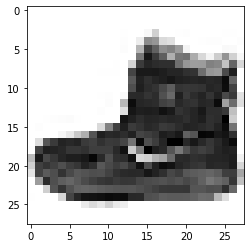

In [10]:
plt.imshow(X_train[0], cmap='Greys')

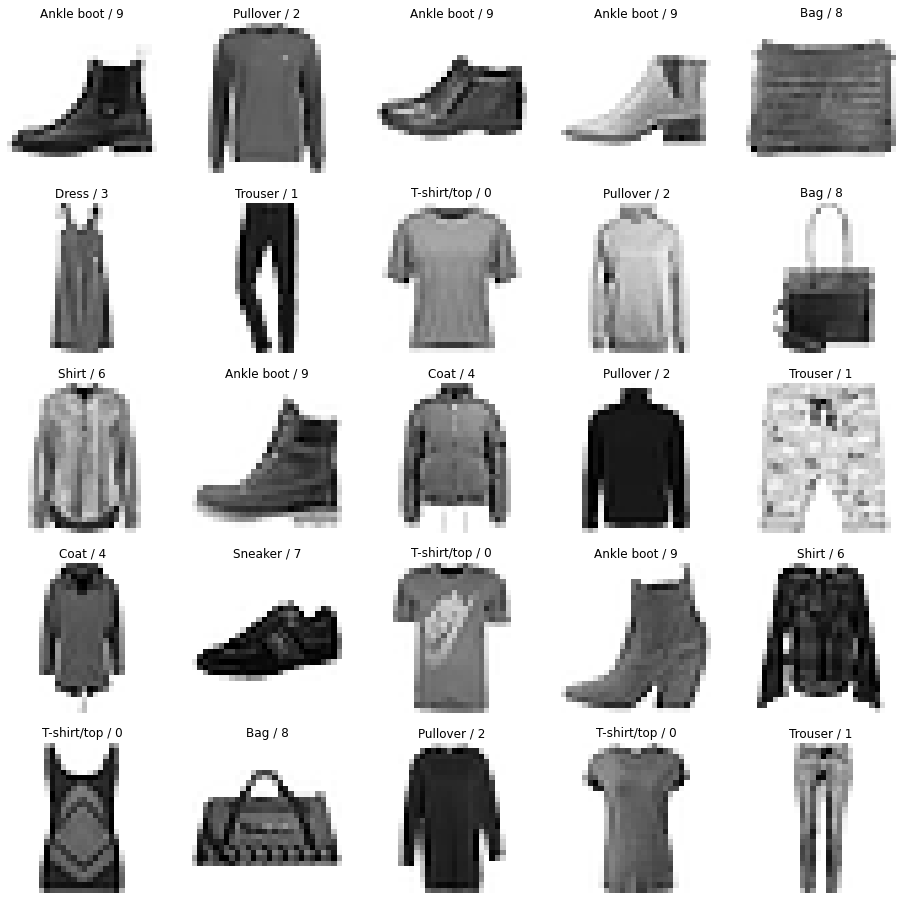

In [11]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
X_train.ndim

3

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [17]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

In [18]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [20]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 17s 166ms/step - loss: 0.6331 - accuracy: 0.7856 - val_loss: 0.4178 - val_accuracy: 0.8550
Epoch 2/10
94/94 [==============================] - 15s 159ms/step - loss: 0.3784 - accuracy: 0.8672 - val_loss: 0.3510 - val_accuracy: 0.8780
Epoch 3/10
94/94 [==============================] - 15s 165ms/step - loss: 0.3291 - accuracy: 0.8843 - val_loss: 0.3320 - val_accuracy: 0.8840
Epoch 4/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2966 - accuracy: 0.8945 - val_loss: 0.3141 - val_accuracy: 0.8904
Epoch 5/10
94/94 [==============================] - 16s 167ms/step - loss: 0.2734 - accuracy: 0.9036 - val_loss: 0.3001 - val_accuracy: 0.8947
Epoch 6/10
94/94 [==============================] - 15s 159ms/step - loss: 0.2582 - accuracy: 0.9077 - val_loss: 0.2857 - val_accuracy: 0.9012
Epoch 7/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2465 - accuracy: 0.9115 - val_loss: 0.2972 - val_accuracy: 0.8949

In [22]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.29, 0.02, 0.  ]], dtype=float32)

In [23]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2732 - accuracy: 0.9025


[0.2731574475765228, 0.9024999737739563]

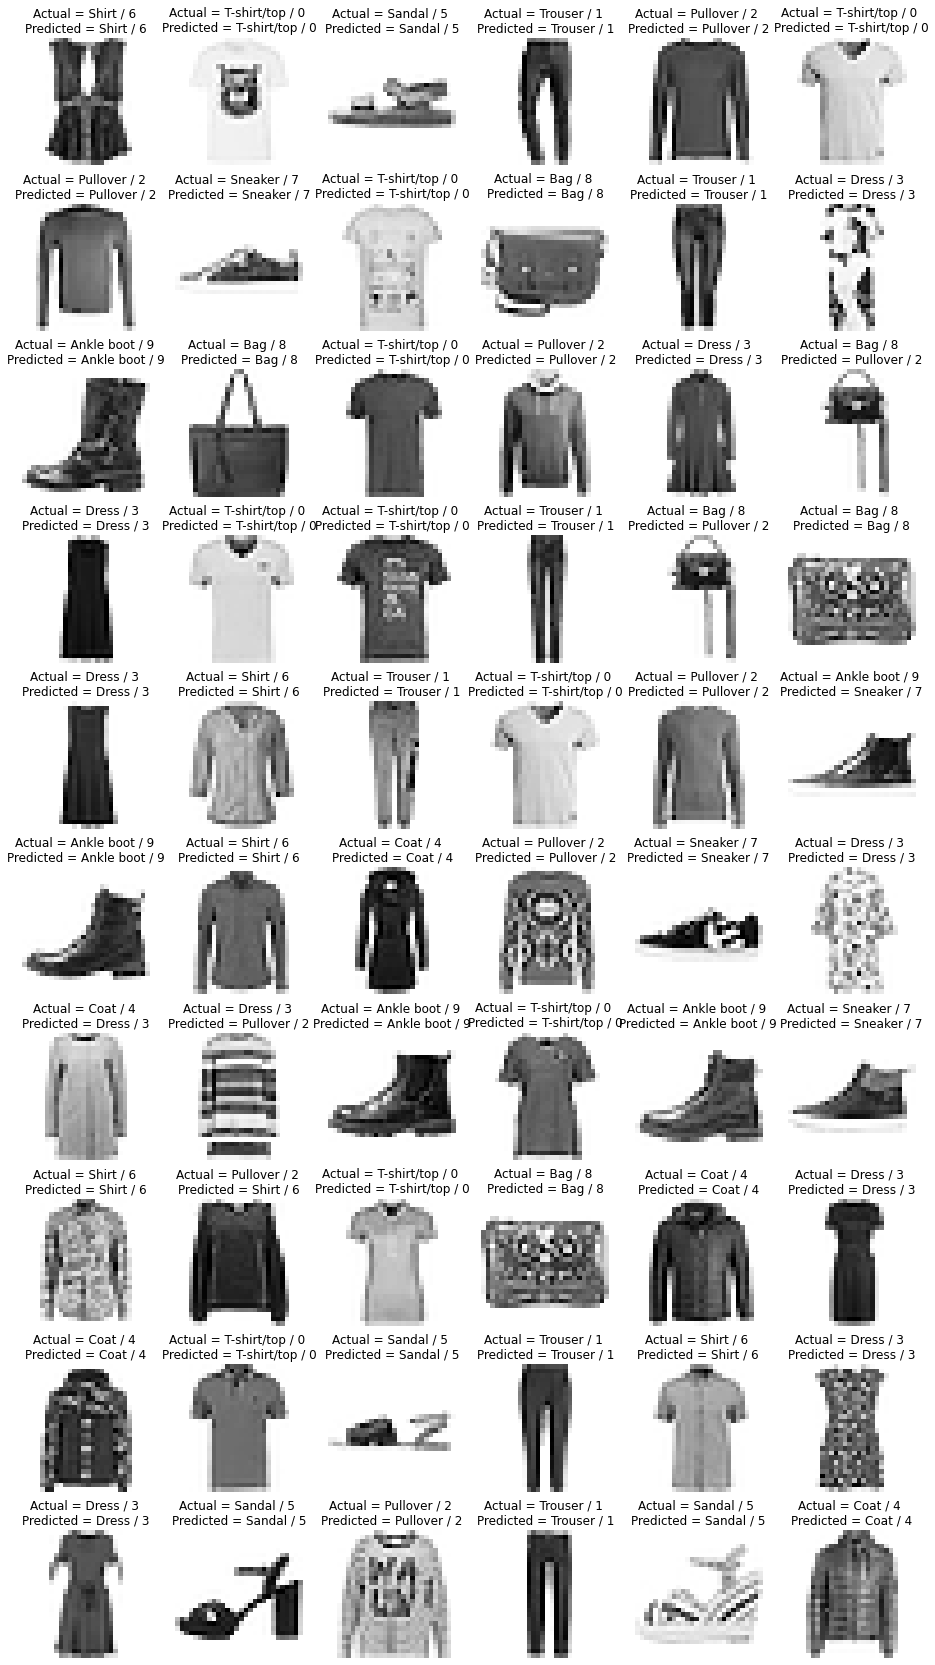

In [25]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<AxesSubplot:>

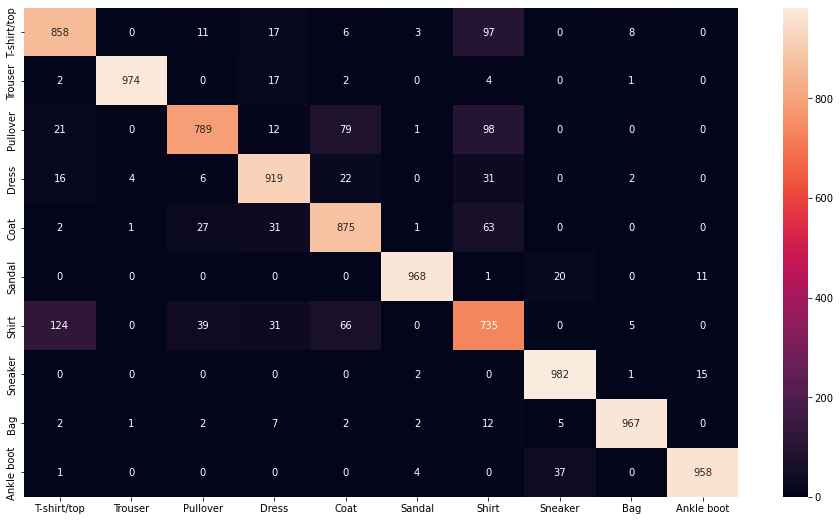

In [26]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [31]:
cnn_model.save('fashion_mnist_cnn_model.h5')

In [32]:
fashion_mnist_cnn_model = models.load_model('fashion_mnist_cnn_model.h5')

In [33]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.79      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [34]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 120ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],
      dtype=float32)

In [35]:
np.argmax(Y_pred_sample[0])

9

In [36]:
y_test[0]

9

In [37]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [38]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 20s 195ms/step - loss: 1.0215 - accuracy: 0.6150 - val_loss: 0.5832 - val_accuracy: 0.7745
Epoch 2/20
94/94 [==============================] - 18s 188ms/step - loss: 0.5543 - accuracy: 0.7921 - val_loss: 0.4724 - val_accuracy: 0.8250
Epoch 3/20
94/94 [==============================] - 18s 192ms/step - loss: 0.4707 - accuracy: 0.8269 - val_loss: 0.4220 - val_accuracy: 0.8428
Epoch 4/20
94/94 [==============================] - 18s 197ms/step - loss: 0.4116 - accuracy: 0.8479 - val_loss: 0.3694 - val_accuracy: 0.8643
Epoch 5/20
94/94 [==============================] - 18s 187ms/step - loss: 0.3759 - accuracy: 0.8626 - val_loss: 0.3468 - val_accuracy: 0.8723
Epoch 6/20
94/94 [==============================] - 17s 186ms/step - loss: 0.3505 - accuracy: 0.8710 - val_loss: 0.3279 - val_accuracy: 0.8777
Epoch 7/20
94/94 [==============================] - 18s 187ms/step - loss: 0.3267 - accuracy: 0.8787 - val_loss: 0.3198 - val_accuracy: 0.8796

In [40]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [41]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [42]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 40s 403ms/step - loss: 1.1579 - accuracy: 0.5541 - val_loss: 0.5954 - val_accuracy: 0.7690
Epoch 2/50
94/94 [==============================] - 36s 387ms/step - loss: 0.5827 - accuracy: 0.7815 - val_loss: 0.4907 - val_accuracy: 0.8158
Epoch 3/50
94/94 [==============================] - 36s 386ms/step - loss: 0.4776 - accuracy: 0.8247 - val_loss: 0.4017 - val_accuracy: 0.8535
Epoch 4/50
94/94 [==============================] - 36s 385ms/step - loss: 0.4109 - accuracy: 0.8553 - val_loss: 0.3697 - val_accuracy: 0.8637
Epoch 5/50
94/94 [==============================] - 36s 387ms/step - loss: 0.3640 - accuracy: 0.8706 - val_loss: 0.3534 - val_accuracy: 0.8737
Epoch 6/50
94/94 [==============================] - 40s 426ms/step - loss: 0.3372 - accuracy: 0.8799 - val_loss: 0.3548 - val_accuracy: 0.8744
Epoch 7/50
94/94 [==============================] - 38s 409ms/step - loss: 0.3128 - accuracy: 0.8895 - val_loss: 0.3144 - val_accuracy: 0.8869

In [44]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [45]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4417 - accuracy: 0.9002


[0.4417082965373993, 0.9002000093460083]